# **1- EXPLORATORY DATA ANALYSIS**

### Importing Libraries

In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataframe

In [248]:
df = pd.read_csv('adcc_historical_data.csv', sep=';')

### Checking the Dataframe

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   match_id       1028 non-null   int64 
 1   winner_id      1028 non-null   int64 
 2   winner_name    1028 non-null   object
 3   loser_id       1028 non-null   int64 
 4   loser_name     1028 non-null   object
 5   win_type       1028 non-null   object
 6   submission     400 non-null    object
 7   winner_points  1028 non-null   int64 
 8   loser_points   1028 non-null   int64 
 9   adv_pen        29 non-null     object
 10  weight_class   1028 non-null   object
 11  sex            1028 non-null   object
 12  stage          1028 non-null   object
 13  year           1028 non-null   int64 
dtypes: int64(6), object(8)
memory usage: 112.6+ KB


### First Five Rows

In [250]:
df.head()

,match_id,winner_id,winner_name,loser_id,loser_name,win_type,submission,winner_points,loser_points,adv_pen,weight_class,sex,stage,year
0,3314,484,Murilo Santana,733,Vinicius Magalhaes,DECISION,NaN,-1,-1,NaN,ABS,M,4F,2011
1,35049,7507,Nicholas Meregali,9554,Henrique Cardoso,SUBMISSION,Kimura,-1,-1,NaN,99KG,M,R1,2022
2,35053,7507,Nicholas Meregali,1740,Yuri Simoes,DECISION,NaN,-1,-1,NaN,99KG,M,4F,2022
3,35057,7507,Nicholas Meregali,576,Rafael Lovato Jr,POINTS,NaN,0,0,PEN,99KG,M,3RD,2022
4,35096,7507,Nicholas Meregali,11797,Giancarlo Bodoni,POINTS,NaN,6,2,NaN,ABS,M,4F,2022


### Descriptive Statistics of Numeric Columns

In [251]:
df.describe()

,match_id,winner_id,loser_id,winner_points,loser_points,year
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,9190.565175,2487.659533,2944.011673,0.807393,-0.590467,2010.874514
std,11085.517307,3489.950628,3572.119124,3.123530,0.674033,7.369033
min,140.000000,-1.000000,-1.000000,-1.000000,-1.000000,1998.000000
25%,1173.500000,195.000000,-1.000000,-1.000000,-1.000000,2005.000000
50%,3304.500000,644.000000,939.000000,-1.000000,-1.000000,2011.000000
75%,13904.250000,3009.000000,5463.000000,2.000000,0.000000,2017.000000
max,35103.000000,12922.000000,13095.000000,22.000000,6.000000,2022.000000


### Standardizing the Data

In [252]:
df['win_type'] = df['win_type'].replace('DESQUALIFICATION', 'DISQUALIFICATION')

### Checking For Duplicates

In [253]:
df['match_id'].duplicated().sum()

0

### Checking For Missing Values

In [254]:
df.isnull().sum()

match_id           0
winner_id          0
winner_name        0
loser_id           0
loser_name         0
win_type           0
submission       628
winner_points      0
loser_points       0
adv_pen          999
weight_class       0
sex                0
stage              0
year               0
dtype: int64

### Number of Fighters

In [255]:
pd.concat([df['winner_name'], df['loser_name']]).nunique()

614

### Number of Fights In Each Year

In [256]:
df['year'].value_counts().sort_index(ascending=False)

year
2022    109
2019    104
2017    102
2015     93
2013     87
2011     89
2009     72
2007     59
2005     66
2003     66
2001     64
2000     51
1999     45
1998     21
Name: count, dtype: int64

### Top 10 Fighters With Most Wins

In [257]:
df['winner_name'].value_counts().head(10)

winner_name
Alexandre Ribeiro     30
Marcelo Garcia        27
Saulo Ribeiro         22
Andre Galvao          22
Leonardo Vieira       21
Fabricio Werdum       20
Gordon Ryan           20
Roberto Abreu         20
Vinicius Magalhaes    19
Pablo Popovitch       19
Name: count, dtype: int64

### Top 10 Fighters With Most Losses

In [258]:
df['loser_name'].value_counts().head(10)

loser_name
Alexandre Ribeiro     13
Rafael Lovato Jr      12
Baret Yoshida         11
Vinicius Magalhaes    10
Gary Tonon            10
Leonardo Vieira        9
Ricco Rodriguez        9
Roberto Abreu          9
Dean Lister            9
A. Cacareco            8
Name: count, dtype: int64

### Win Type Values

In [259]:
df['win_type'].unique()

array(['DECISION', 'SUBMISSION', 'POINTS', 'INJURY', 'DISQUALIFICATION'],
      dtype=object)

###  Number of Matches for Each Sex

In [260]:
df['sex'].value_counts().reset_index()

,sex,count
0,M,986
1,F,42


### First Female Match

In [272]:
females = df[df['sex'] == 'F']
first_f = females['year'].idxmin()
first_f = df.loc[first_f]

print('Year:', first_f['year'], '', 'Winner:', first_f['winner_name'], '', 'Loser:', first_f['loser_name'])

Year: 2011  Winner: Gabrielle Garcia  Loser: Penny Thomas


# **2- DATA VISUALIZATION**

### Number of Occurrences of Each Win Type

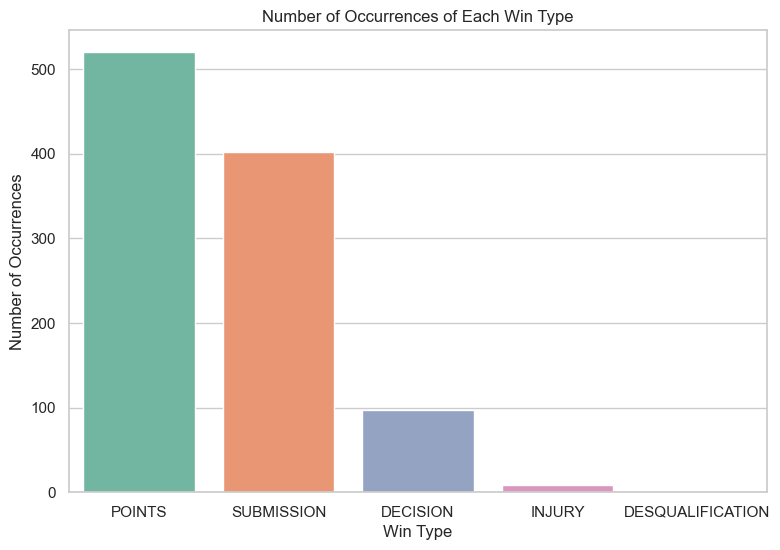

,Total,Proportion
win_type,,
POINTS,520,0.505837
SUBMISSION,402,0.391051
DECISION,97,0.094358
INJURY,8,0.007782
DESQUALIFICATION,1,0.000973


In [ ]:
sns.set_style('whitegrid')

plt.figure(figsize=(9, 6))

order = df['win_type'].value_counts().sort_values(ascending=False).index

sns.countplot(data=df, x='win_type', palette='Set2', order=order)
plt.title('Number of Occurrences of Each Win Type')
plt.xlabel('Win Type')
plt.ylabel('Number of Occurrences')
plt.show()

df.groupby('win_type').agg(Total=('match_id', 'count'), Proportion=('match_id', lambda x: len(x) / len(df))).sort_values(by='Total', ascending=False)

### Spread of Points

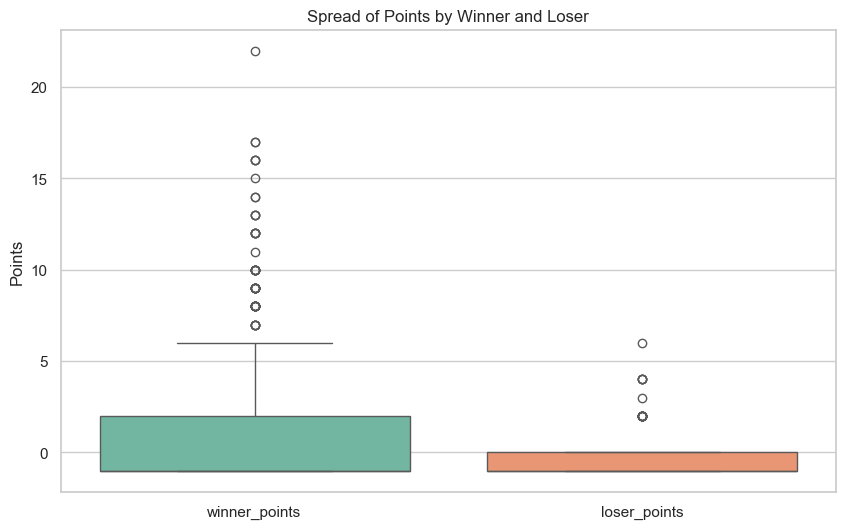

,winner_points,loser_points
count,1028.000000,1028.000000
mean,0.807393,-0.590467
std,3.123530,0.674033
min,-1.000000,-1.000000
25%,-1.000000,-1.000000
50%,-1.000000,-1.000000
75%,2.000000,0.000000
max,22.000000,6.000000


In [277]:
df_long = pd.melt(df, value_vars=['winner_points', 'loser_points'], var_name='Result', value_name='Points')

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_long, x='Result', y='Points', palette='Set2')

plt.title('Spread of Points by Winner and Loser')
plt.xlabel('')
plt.show()

df[['winner_points', 'loser_points']].describe()

### Submissions Used

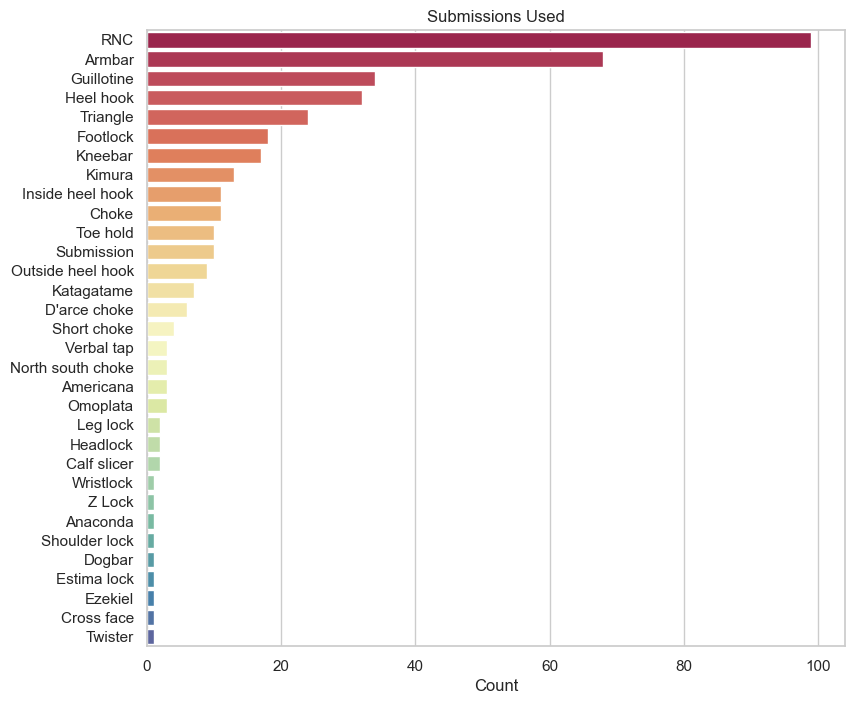

In [ ]:
plt.figure(figsize=(9, 8))

submissions = df['submission'].value_counts().reset_index()
submissions.columns = ['Submission', 'Count']

sns.barplot(data=submissions, x='Count', y='Submission', palette='Spectral')
plt.title('Submissions Used')
plt.xlabel('Count')
plt.ylabel('')
plt.show()

### Number of Matches of Each Weight Class

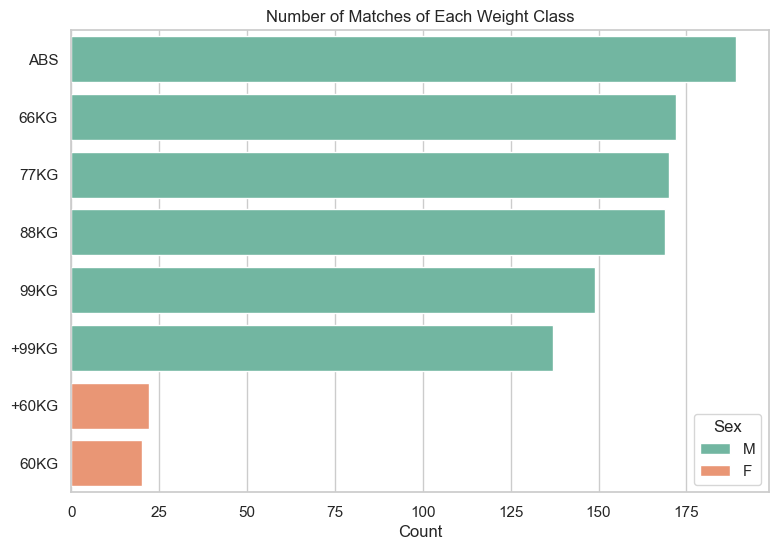

In [ ]:
weight = df.groupby(['weight_class', 'sex']).size().reset_index(name='Count')
weight.columns = ['Weight Class', 'Sex', 'Count']

weight = weight.sort_values(by='Count', ascending=False)

plt.figure(figsize=(9, 6))
sns.barplot(data=weight, x='Count', y='Weight Class', hue='Sex', palette='Set2', hue_order=['M', 'F'])
plt.title('Number of Matches of Each Weight Class')
plt.xlabel('Count')
plt.ylabel('')
plt.show()

### Number of Matches for Each Sex

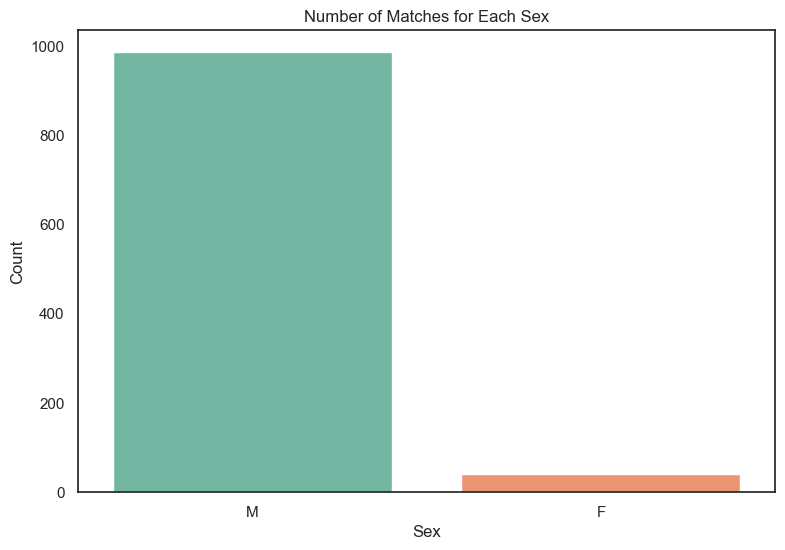

In [ ]:
sns.set_style('white')

plt.figure(figsize=(9, 6))
sns.countplot(data=df, x='sex', palette='Set2')
plt.title('Number of Matches for Each Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

### Win Types Through the Years

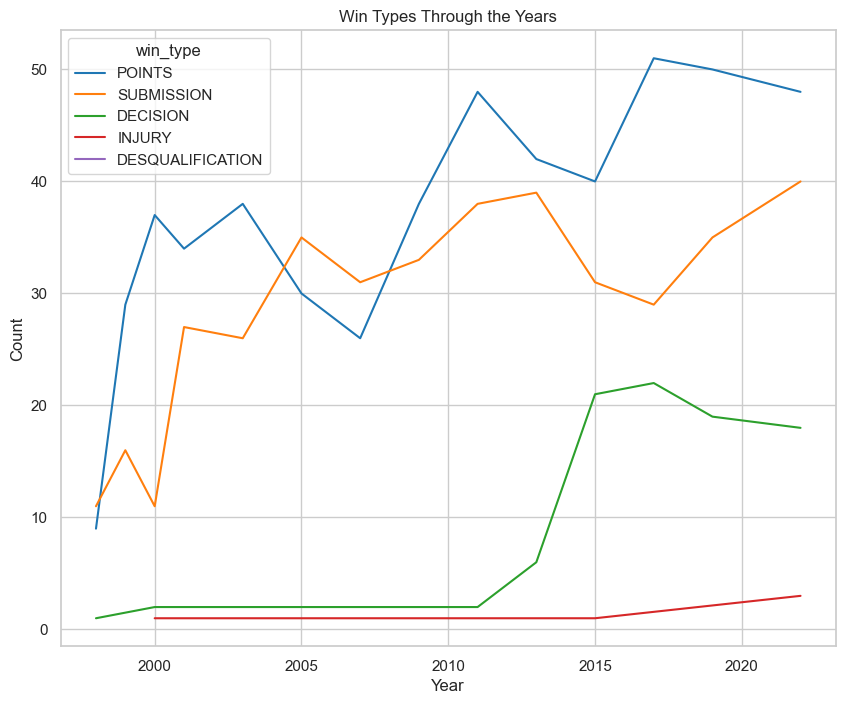

In [ ]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 8))

wins_year = df.groupby(['win_type', 'year']).size().reset_index(name='Count')

sns.lineplot(data=wins_year, x='year', y='Count', hue='win_type', hue_order=order)
plt.title('Win Types Through the Years')
plt.xlabel('Year')
plt.show()